In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import Counter
import math

In [2]:
batteries = pd.read_csv('batteries.csv',header=None)
sat = pd.read_csv('sat.csv')
mpg = pd.read_csv('mpg.csv')

In [3]:
batteries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       48 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


In [4]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   obs     234 non-null    int64  
 1   sex     234 non-null    int64  
 2   maj     234 non-null    int64  
 3   satm    234 non-null    int64  
 4   satv    234 non-null    int64  
 5   hsm     234 non-null    int64  
 6   hss     234 non-null    int64  
 7   hse     234 non-null    int64  
 8   gpa     234 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 16.6 KB


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   American Car MPG   249 non-null    int64
 1   Japanese Cars MPG  249 non-null    int64
dtypes: int64(2)
memory usage: 4.0 KB


In [6]:
batteries.head(1)

,0
0,137.0


In [7]:
sat.head(1)

,obs,sex,maj,satm,satv,hsm,hss,hse,gpa
0,1,1,1,640,530,8,6,8,2.35


In [8]:
mpg = mpg.loc[mpg['Japanese Cars MPG'] != -999]
mpg

,American Car MPG,Japanese Cars MPG
0,18,24
1,15,27
2,18,27
3,16,25
4,17,31
...,...,...
74,18,34
75,18,38
76,23,32
77,11,38


#### A company selling batteries claims that the average life for its batteries before a recharge is necessary is at least 100 hours. The data is in the file batteries.csv. One of its clients wanted to verify this claim by testing 48 batteries as described in the Figure 1. Is the company’s claim correct at the alpha=5% level?

In [41]:
'''H0 = avg >= 100
Ha = avg < 100
alpha = 0.05
n = 48'''
# one = stats.norm.ppf(0.05, loc =batteries.mean(), scale=np.std(batteries))
# plt.axvline(one,0,1)

# # plt.axvline(one,0,0.95)
# sns.distplot(stats.norm.rvs(loc= batteries.mean(), scale = np.std(batteries), size=48))
mean = np.mean(batteries[0])
std = np.std(batteries[0], ddof = 1)
# ddof means degrees of freedom you want to subtract
'''Since we don't know the population mean, \mu, we use the sample mean, \overline{x}. We are dividing by n-1 instead of n to compensate for the fact 
we are calculating the differences from the sample mean instead of the population mean. Otherwise, we would consistently underestimate the variance around 
the population mean. The differences bewteen the data and the sample mean tend to be smaller than the differences between the data and the population mean.
'''
print(mean)
print(std)

103.8125
23.958879888924585


## WITHOUT Converting to Z score for standard normal curve
##### via CLT, assume normality of the sampling distribution of the sample mean

##### Under null hypothesis, we assume that mean is drawn from a normal distribution with mean = 100 and std error = std/math.sqrt(48)

In [42]:
# Compute the cutoff for H0 of mean = 100
# if the sample mean is above the cutoff, reject the null
# if the sample mean is below the cutoff, fail to reject the null

std_error = std/math.sqrt(48)
cutoff = stats.norm.ppf(.95, loc =100, scale=std_error)
cutoff

105.68817760870233

In [43]:
print(f'since mean = {mean} < {cutoff}, fail to reject the null hypothesis')

since mean = 103.8125 < 105.68817760870233, fail to reject the null hypothesis


In [10]:
blah = stats.norm.rvs(loc= batteries.mean(), scale = np.std(batteries), size=48)
stats.ttest_1samp(a = blah, popmean = batteries.mean())

Ttest_1sampResult(statistic=0   -0.050891
dtype: float64, pvalue=array([0.95962828]))

#### The file mpg.csv has sample data on the miles per gallon from various US and Japanese cars
#### Test the null hypothesis that the population of US cars has the same MPG as the population of Japanese at the 5% level.

In [11]:
print('H0 - US mpg = Japanese mpg\nHa - US mpg != Japanese mpg\nalpha = 0.05')

H0 - US mpg = Japanese mpg
Ha - US mpg != Japanese mpg
alpha = 0.05


In [12]:
US_mean = np.mean(mpg['American Car MPG'])
Japanese_mean = np.mean(mpg['Japanese Cars MPG'])
print("US mean value:",US_mean)
print("Japanese mean value:",Japanese_mean)

US mean value: 16.025316455696203
Japanese mean value: 30.481012658227847


In [13]:
US_std = np.std(mpg['American Car MPG'])
Japanese_std = np.std(mpg['Japanese Cars MPG'])
print("US std value:",US_std)
print("Japanese std value:",Japanese_std)

US std value: 4.170343407965598
Japanese std value: 6.068930545150857


In [44]:
ttest,pval = stats.ttest_ind(mpg['American Car MPG'],mpg['Japanese Cars MPG'])
print("p-value = ",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we fail to reject null hypothesis")

p-value =  3.267637437870519e-38
we reject null hypothesis


US Chart


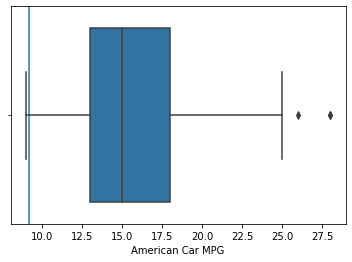

In [55]:
print('US Chart')
US = stats.norm.ppf(0.05, loc =US_mean, scale=US_std)
plt.axvline(US,0,1)

# plt.axvline(one,0,0.95)
# sns.distplot(stats.norm.rvs(loc= US_mean, scale = US_std, size=79))
sns.boxplot(x=mpg['American Car MPG'],data=mpg)

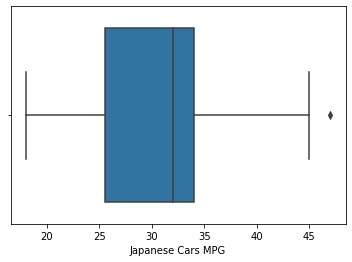

In [53]:
sns.boxplot(x=mpg['Japanese Cars MPG'],data=mpg)

#### The file sat.csv has various data
#### High school math grades (HSM)
#### High school science grades (HSS)
#### High school English grades (HSE)
#### SAT Math (SATM)
#### SAT Verbal (SATV)
#### Gender unknown which is male or female

#### Run a bunch of tests! do gender 1 and gender 2 have the same population means for HSM, HSE, SATM, and SATV?

In [21]:
# means for HSM scores
g1_HSM = sat.loc[sat.sex == 1]
g2_HSM = sat.loc[sat.sex == 2]
g1_HSMmean = np.mean(g1_HSM.hsm)
g2_HSMmean = np.mean(g2_HSM.hsm)
print("Gender1 HSM mean value:",g1_HSMmean)
print("Gender2 HSM mean value:",g2_HSMmean)

Gender1 HSM mean value: 8.256410256410257
Gender2 HSM mean value: 8.820512820512821


In [ ]:
g1_SATM = sat.loc[sat.sex == 1]
g2_SATM = sat.loc[sat.sex == 2]
g1_SATMmean = np.mean(g1_HSM.hsm)
g2_SATMmean = np.mean(g2_HSM.hsm)
print("Gender1 HSM mean value:",g1_HSMmean)
print("Gender2 HSM mean value:",g2_HSMmean)

In [22]:
sat['SATscore'] = sat.satm + sat.satv


In [26]:
g1_SATscore = sat.loc[sat.sex == 1]
g2_SATscore = sat.loc[sat.sex == 2]
g1_SATscore = np.mean(g1_SATscore.SATscore)
g2_SATscore = np.mean(g2_SATscore.SATscore)
print("Gender1 SATscore mean value:",g1_SATscore)
print("Gender2 SATscore mean value:",g2_SATscore)

Gender1 SATscore mean value: 1119.820512820513
Gender2 SATscore mean value: 1101.128205128205


In [31]:
g1_SATscore = sat.loc[sat.sex == 1]
g2_SATscore = sat.loc[sat.sex == 2]
g1_SATscore1 = np.std(g1_SATscore.SATscore)
g2_SATscore2 = np.std(g2_SATscore.SATscore)
print("Gender1 SATscore std value:",g1_SATscore)
print("Gender2 SATscore std value:",g2_SATscore)

Gender1 SATscore std value:      obs  sex  maj  satm  satv  hsm  hss  hse   gpa  SATscore
0      1    1    1   640   530    8    6    8  2.35      1170
1      2    1    1   670   600    9   10    7  2.08      1270
2      3    1    1   600   400    8    8    7  3.21      1000
3      4    1    1   570   480    7    7    6  2.34      1050
4      5    1    1   510   530    6    8    8  1.40      1040
..   ...  ...  ...   ...   ...  ...  ...  ...   ...       ...
112  113    1    3   586   670    9    9   10  2.67      1256
113  114    1    3   700   500    9    8    7  2.51      1200
114  115    1    3   550   570    7    7    5  1.79      1120
115  116    1    3   505   518    6    6    8  2.42      1023
116  117    1    3   515   285    5    7    7  0.58       800

[117 rows x 10 columns]
Gender2 SATscore std value:      obs  sex  maj  satm  satv  hsm  hss  hse   gpa  SATscore
117  118    2    1   570   570   10   10   10  2.76      1140
118  119    2    1   570   570   10   10   10  2.76

In [34]:
# SAT scores t-test
ttest,pval = stats.ttest_ind(g1_SATscore.SATscore,g2_SATscore.SATscore)
print("p-value = ",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we fail to reject null hypothesis")

p-value =  0.3285585469215587
we fail to reject null hypothesis
